In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from arcs.generate import GraphGenerator

graph = GraphGenerator().from_file(
    filename='../app/data/scan_dft_data.json',
    temperature=248,
    pressure=20,
    max_reaction_length=5
)

/Users/badw/github-projects/arcs/arcs/generate.py:255: RuntimeWarning: overflow encountered in exp
  K = np.exp(


In [3]:
#import matplotlib.pyplot as plt
#import networkx as nx 
#import numpy as np 
#G = graph #

#node_colours= []
#node_sizes = []
#for node in list(G.nodes):
#    if isinstance(node,int):
#        node_colours.append('black')
#        node_sizes.append(0)
#    else:
#        node_colours.append('white')
#        node_sizes.append(100)#

#edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
#vmin = np.min(weights)
#vmax = np.max(weights)
#cmap = plt.cm.viridis#

#nx.draw_random(G,node_color=node_colours,node_size=node_sizes,edgelist=edges,#edge_color=weights,width=0.1,edge_cmap=cmap,vmin=vmin,vmax=vmax)

production run

In [98]:
from arcs.traversal import Traversal
from arcs.generate import GenerateInitialConcentrations

gic = GenerateInitialConcentrations(graph=graph).update_ic(
    {'H2O':30,'O2':10,'SO2':10,'H2S':10,'NO2':0}
    #{'H2O':30,'O2':10,'SO2':10,'H2S':10,'NO2':10}
    #{'H2O':30,'SO2':10}
    )

t = Traversal(graph=graph)
t.rank_by_number_of_atoms = True

data = t.sample(initial_concentrations=gic,ncpus=4,nsamples=1000,progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [236]:
from arcs.analysis import AnalyseSampling
import pandas as pd 

analysis = AnalyseSampling()
new_data = analysis.reduce_data_by_minimum_path_length(data,4)
pd.Series(analysis.reaction_statistics(new_data)).sort_values(ascending=False)

1 H2 + 1 SO2 = 1 O2 + 1 H2S                 243
1 H2O + 1 SO2 = 1 H2SO3                     190
2 H2 + 1 O2 = 2 H2O                         142
3 H2 + 1 SO2 = 2 H2O + 1 H2S                 83
1 H2 + 1 SO2 + 1 NO2 = 1 H2SO3 + 1 NO        79
1 H2O + 1 NO2 + 1 NO = 2 HNO2                68
3 O2 + 2 H2S = 2 H2O + 2 SO2                 60
1 H2 + 1 H2SO4 = 2 H2O + 1 SO2               51
1 H2 + 1 NO2 = 1 H2O + 1 NO                  51
1 H2O + 1 SO2 + 1 NO2 = 1 H2SO4 + 1 NO       48
1 H2O + 2 NO2 = 1 HNO3 + 1 HNO2              47
1 O2 + 2 H2O + 2 SO2 = 2 H2SO4               43
2 O2 + 1 N2 = 2 NO2                          40
2 H2S + 6 SO2 + 2 N2 = 1 S8 + 4 HNO3         36
2 H2 + 2 SO2 + 1 N2 = 2 H2S + 2 NO2          36
8 O2 + 1 S8 = 8 SO2                          32
1 O2 + 2 NO = 2 NO2                          28
3 H2 + 1 H2SO3 = 3 H2O + 1 H2S               24
1 O2 + 1 H2S + 2 NO2 = 1 SO2 + 2 HNO2        24
2 O2 + 1 H2S + 2 NO2 = 1 HNO3 + 1 NOHSO4     20
1 H2SO4 + 1 N2 = 1 H2S + 2 NO2          

In [100]:
average_data = analysis.average_sampling(new_data)
average_data = average_data.loc[~(average_data==0).all(axis=1)]
average_data.round(5)
average_data.sort_values(by='diff',inplace=True)
average_data.round(2)

,initial,mean,diff,std
O2,10.0,2.61,-7.39,4.61
H2S,10.0,2.71,-7.29,4.11
H2SO3,0.0,0.06,0.06,0.72
S8,0.0,0.10,0.10,0.35
H2SO4,0.0,0.40,0.40,1.80
H2O,30.0,31.80,1.80,7.69
H2,0.0,3.43,3.43,4.74
SO2,10.0,14.98,4.98,5.12


<Axes: >

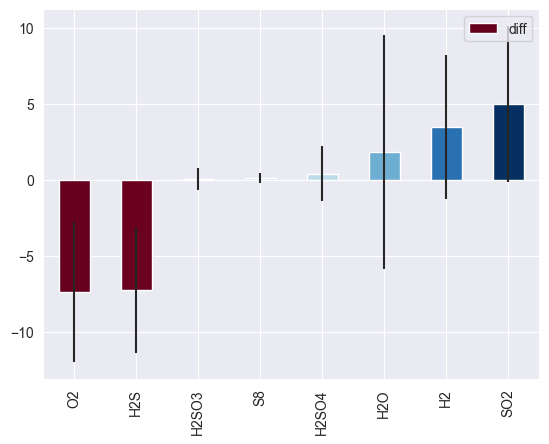

In [101]:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

sns.set_style('darkgrid')
sns.set_palette('pastel')


norm = colors.Normalize(vmin=average_data['diff'].min(), vmax=average_data['diff'].max())
cmap = cm.RdBu  # or any other colormap

bar_colors = [cmap(norm(value)) for value in average_data['diff']]

average_data.plot.bar(y='diff',yerr='std',color=bar_colors)

In [235]:
frequency.sort_values(ascending=False)

401     391
19      273
8       234
62      131
455     123
351     107
3348     87
222      75
20       72
300      71
3162     64
131      59
1860     59
30       52
329      51
184      50
38       40
1833     36
438      32
354      31
4102     28
471      26
4858     24
4855     24
5097     20
294      20
310      16
13       16
252      12
2682     12
226      12
402      12
11       12
295       8
104       8
32        8
67        8
4053      8
4965      8
306       8
160       8
320       7
3679      4
4697      4
3652      4
4710      4
3511      4
25        4
2940      4
2653      4
1390      4
801       4
469       4
405       4
384       4
344       4
175       4
146       4
18        4
dtype: int64

['H2SO3',
 'H2O',
 'SO2',
 'O2',
 'H2S',
 'H2SO4',
 'HNO3',
 'NOHSO4',
 'H2',
 'S8',
 'NO',
 'NO2',
 'N2',
 'HNO2',
 'NH3']

In [258]:
import networkx as nx 
from pyvis.network import Network 
import numpy as np 


reaction_statistics = analysis.reaction_statistics(data)

rs = {}
nodes = [graph.nodes()[x] for x in graph.nodes() if isinstance(x,int)]
for i,node in enumerate(nodes):
    if node['reaction']['reaction_string'] in list(reaction_statistics):
        rs[i] = node['reaction'] 
        rs[i]['frequency'] = reaction_statistics[node['reaction']['reaction_string']]
        rs[i]['equilibrium_constant'] = node['equilibrium_constant']
        
        

G = nx.MultiDiGraph(directed=True)

for i,reaction in rs.items():
    if reaction['equilibrium_constant'] < 1:

        G.add_weighted_edges_from(
                [compound,str(i),1] for compound in reaction['products']
                ) #products -> reaction
        G.add_weighted_edges_from(
                [str(i),compound,1] for compound in reaction['reactants']
                ) #reaction -> products
    else:
        G.add_weighted_edges_from(
                [compound,str(i),1] for compound in reaction['reactants']
                ) #products -> reaction
        G.add_weighted_edges_from(
                [str(i),compound,1] for compound in reaction['products']
                ) #reaction -> products

compound_nodes = []
reaction_nodes = []
for node in G.nodes():
    try:
        int(node)
        reaction_nodes.append(node)
    except Exception:
        compound_nodes.append(node)


            
reaction_node_sizes = {str(i):8  for i,reaction in rs.items()} #reaction['frequency']
nx.set_node_attributes(G,reaction_node_sizes,name='size')



#set reaction node colour based on frequency
import numpy as np
import matplotlib as mpl

frequency = pd.Series({str(i):reaction['frequency']  for i,reaction in rs.items()}) #
cmap = mpl.colormaps['viridis']
norm = mpl.colors.Normalize(vmin=frequency.min(),vmax=frequency.max())
colours = {str(r):mpl.colors.rgb2hex(cmap(norm(freq))) for r,freq in frequency.items()}
nx.set_node_attributes(G,colours,name='color')

compound_node_colours = {node:'White' for node in compound_nodes}
nx.set_node_attributes(G,compound_node_colours,name='color')

#set up pyvis graph
g = Network(height='750%',width='100%',bgcolor="#222222",font_color="white",notebook=False,directed=True,neighborhood_highlight=True,filter_menu=True)

g.repulsion(
    node_distance=100,
    spring_length=50,
    damping=0.01,
)
g.from_nx(G,edge_scaling=False)

#edgecolors


#for edge in g.get_edges():
#   edge['color'] = 'white'
#   edge['highlight_color'] = 'red'
g.barnes_hut()

g.save_graph('graph.html')

In [244]:
Network?

Init signature:
Network(
    height='600px',
    width='100%',
    directed=False,
    notebook=False,
    neighborhood_highlight=False,
    select_menu=False,
    filter_menu=False,
    bgcolor='#ffffff',
    font_color=False,
    layout=None,
    heading='',
    cdn_resources='local',
)
Docstring:     
The Network class is the focus of this library. All viz functionality
should be implemented off of a Network instance.

To instantiate:

>>> nt = Network()
Init docstring:
:param height: The height of the canvas
:param width: The width of the canvas
:param directed: Whether or not to use a directed graph. This is false
                 by default.
:param notebook: True if using jupyter notebook.
:param select_menu: sets the option to highlight nodes and the neighborhood
:param filter_menu: sets the option to filter nodes and edges based on attributes
:param bgcolor: The background color of the canvas.
:param cdn_resources: Where to pull resources for css and js files. Defaults to local

In [237]:
g.get_edges()[2]

{'width': 1, 'from': 'H2SO3', 'to': '438', 'arrows': 'to', 'color': 'grey'}

In [161]:
G.nodes['8']

{'size': 0, 'color': 'red'}

In [157]:
df = pd.Series(frequency)
normalized_df=(df-df.min())/(df.max()-df.min())

normalized_df

8       0.594315
11      0.020672
13      0.031008
18      0.000000
19      0.695090
20      0.175711
25      0.000000
30      0.124031
32      0.010336
38      0.093023
62      0.328165
67      0.010336
104     0.010336
131     0.142119
146     0.000000
160     0.010336
175     0.000000
184     0.118863
222     0.183463
226     0.020672
252     0.020672
294     0.041344
295     0.010336
300     0.173127
306     0.010336
310     0.031008
320     0.007752
329     0.121447
344     0.000000
351     0.266150
354     0.069767
384     0.000000
401     1.000000
402     0.020672
405     0.000000
438     0.072351
455     0.307494
469     0.000000
471     0.056848
801     0.000000
1390    0.000000
1833    0.082687
1860    0.142119
2653    0.000000
2682    0.020672
2940    0.000000
3162    0.155039
3348    0.214470
3511    0.000000
3652    0.000000
3679    0.000000
4053    0.010336
4102    0.062016
4697    0.000000
4710    0.000000
4855    0.051680
4858    0.051680
4965    0.010336
5097    0.0413

In [153]:
G.nodes()['8']

{'size': 234}

effect of adding NO2

In [111]:
from arcs.traversal import Traversal
from arcs.generate import GenerateInitialConcentrations

gic = GenerateInitialConcentrations(graph=graph).update_ic(
    #{'H2O':30,'O2':10,'SO2':10,'H2S':10,'NO2':0}
    {'H2O':30,'O2':10,'SO2':10,'H2S':10,'NO2':10}
    #{'H2O':30,'SO2':10}
    )

t = Traversal(graph=graph)

t.rank_by_number_of_atoms = True

data = t.sample(initial_concentrations=gic,ncpus=4,nsamples=1000)#,tqdm_kws={'disable':True})

In [112]:
from arcs.analysis import AnalyseSampling
import pandas as pd 

analysis = AnalyseSampling() #use_markdown=True,use_latex=True)
print(pd.Series(analysis.count_path_length(data)))
pd.Series(analysis.reaction_statistics(data)).sort_values(ascending=False).head(10)

5    191
4    228
3    270
2    242
6     36
1     32
dtype: int64


1 H2 + 1 SO2 = 1 O2 + 1 H2S              391
2 H2 + 1 O2 = 2 H2O                      273
1 H2O + 1 SO2 = 1 H2SO3                  234
1 H2O + 1 NO2 + 1 NO = 2 HNO2            131
3 H2 + 1 SO2 = 2 H2O + 1 H2S             123
3 O2 + 2 H2S = 2 H2O + 2 SO2             107
1 H2 + 1 SO2 + 1 NO2 = 1 H2SO3 + 1 NO     87
1 H2O + 2 NO2 = 1 HNO3 + 1 HNO2           75
8 O2 + 1 S8 = 8 SO2                       72
1 H2 + 1 H2SO4 = 2 H2O + 1 SO2            71
dtype: int64

In [113]:
average_data = analysis.average_sampling(data)
average_data = average_data.loc[~(average_data==0).all(axis=1)]
average_data.round(2)
average_data.sort_values(by='diff',inplace=True)
average_data.round(1)

,initial,mean,diff,std
H2S,10.0,4.8,-5.2,4.7
NO2,10.0,5.9,-4.1,4.9
O2,10.0,6.2,-3.8,6.0
H2O,30.0,29.2,-0.8,6.1
S8,0.0,0.1,0.1,0.3
NH3,0.0,0.1,0.1,0.8
H2SO3,0.0,0.3,0.3,1.6
NOHSO4,0.0,0.3,0.3,1.2
HNO3,0.0,0.5,0.5,1.6
HNO2,0.0,0.6,0.6,1.9


<Axes: >

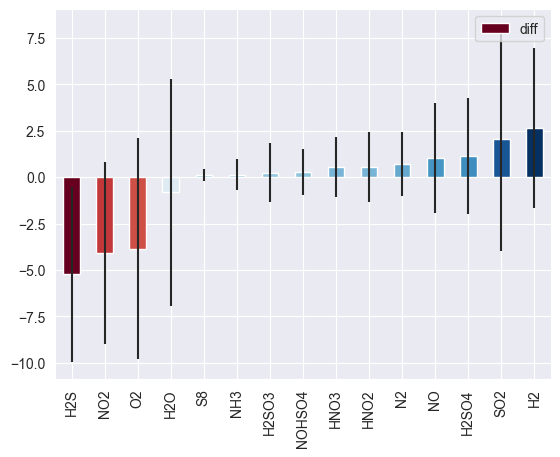

In [114]:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

sns.set_style('darkgrid')
sns.set_palette('pastel')


norm = colors.Normalize(vmin=average_data['diff'].min(), vmax=average_data['diff'].max())
cmap = cm.RdBu  # or any other colormap

bar_colors = [cmap(norm(value)) for value in average_data['diff']]

average_data.plot.bar(y='diff',yerr='std',color=bar_colors)

testing

In [107]:
import networkx as nx 
from pyvis.network import Network 


reaction_statistics = analysis.reaction_statistics(data)

rs = {}
reactions = [graph.nodes()[x]['reaction'] for x in graph.nodes() if isinstance(x,int)]
for i,reaction in enumerate(reactions):
    if reaction['reaction_string'] in list(reaction_statistics):
        rs[i] = reaction 
        rs[i]['frequency'] = reaction_statistics[reaction['reaction_string']]
        

G = nx.MultiDiGraph(directed=True)

for i,reaction in rs.items():
    G.add_weighted_edges_from(
                [compound,str(i),1] for compound in reaction['reactants']
                ) #reactants -> reaction
    G.add_weighted_edges_from(
                [str(i),compound,1] for compound in reaction['products']
                ) #reaction -> products
            
frequency = {str(i):reaction['frequency'] for i,reaction in rs.items()}

nx.set_node_attributes(G,frequency,name='frequency')

g = Network(height=800,width=800,notebook=False,directed=True,neighborhood_highlight=True)
g.from_nx(G,show_edge_weights=False)
g.save_graph('graph.html')

### Speed Test 

In [ ]:
from arcs.traversal import Traversal
from arcs.generate import GenerateInitialConcentrations

gic = GenerateInitialConcentrations(graph=graph).update_ic({'H2O':100,'H2':30,'O2':50,'H2S':100,'NO2':200,'N2':300})
t = Traversal(graph=graph)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=1)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=2)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=4)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=10)

In [ ]:
t.random_walk(gic)